<a href="https://colab.research.google.com/github/Manith-Ratnayake/UCI_machine_learning/blob/main/Dry%20Bean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

dry_bean_df = pd.concat([X,y], axis=1)

In [4]:
dry_bean_df.shape

(13611, 17)

In [6]:
print("No of rows", dry_bean_df.shape[0])
print("No of columns", dry_bean_df.shape[1])

No of rows 13611
No of columns 17


In [8]:
dry_bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [10]:
# Null Values
print(dry_bean_df.isnull().sum().sum())

0


In [14]:
# Duplicate
dry_bean_df_duplicated = dry_bean_df.duplicated().any()
print(dry_bean_df_duplicated)

True


In [15]:
dry_bean_df = dry_bean_df.drop_duplicates()

In [16]:
dry_bean_df_duplicated = dry_bean_df.duplicated().any()
print(dry_bean_df_duplicated)

False


In [17]:
dry_bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [21]:
dry_bean_df.dtypes

,0
Area,int64
Perimeter,float64
MajorAxisLength,float64
MinorAxisLength,float64
AspectRatio,float64
Eccentricity,float64
ConvexArea,int64
EquivDiameter,float64
Extent,float64
Solidity,float64


In [23]:
numeric_dry_bean_df = dry_bean_df.drop(columns=['Class'])

<Axes: >

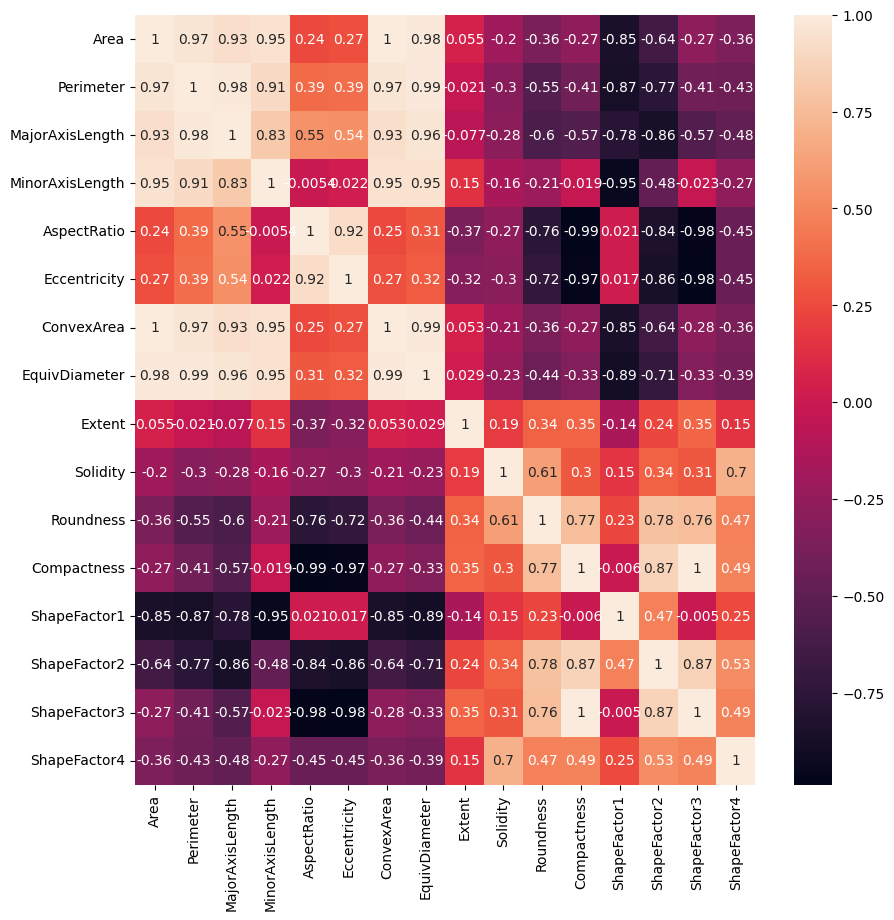

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(numeric_dry_bean_df.corr(), annot  = True)

In [19]:
dry_bean_df['Class'].value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1860
CALI,1630
BARBUNYA,1322
BOMBAY,522


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Test Accuracy: 0.9238
